# Title: Detecting Insults in Social Media

## 1. Business Understanding:
#### Problem Statement:
Online platforms are grappling with a significant amount of harmful content, especially insults, which contributes to a toxic environment, causing mental distress and discouraging users from participating in online communities.

#### Project Description
This project focuses on identifying and analyzing insulting remarks in social media posts. The goal is to develop a model that can effectively detect and classify insults, contributing to the mitigation of online harassment and the creation of a safer and more inclusive online environment.

#### Objectives
1. Develop a model to accurately identify insulting remarks in social media posts.
2. Understand the common patterns and trends in insulting remarks.
3. Evaluate the performance of the model and improve it for better accuracy and efficiency.


#### Impact:
An effective model could significantly reduce manual moderation workload, create a safer online space, encourage positive interactions, and retain users who might otherwise leave due to negative experiences.


#### Progress
- [x] Initial setup of the repository and creation of README
- [x] Data Collection and Preprocessing ( in progress )
- [ ] Exploratory Data Analysis (EDA)
- [ ] Feature Engineering
- [ ] Model Development
- [ ] Model Evaluation
- [ ] Deployment (if applicable)


#### Repository
[Detecting_Insults_In_Social_Media](https://github.com/MehdiMsa/Detecting_Insults_In_Social_Media)


#### Contributors
- Mehdi M'sallem
- Emir Aissa

## 2. Data Understanding:
### 2.1 Data Collection:
#### Data Source:
Teams given dataset from kaggle

#### Nature of Data:

Textual data (social media posts) that may range from short tweets to lengthy blog posts or comments.
Possible presence of slang, abbreviations, emojis, and misspellings, which are common in informal communication.
Potential Features:

 **user_id**: An identifier for the user making the post.
##### - post_date: The date and time when the post was made.
##### - post_content: The actual textual content of the post.
##### - insult: A binary indicator (0 or 1) signifying whether the post is insulting or not.

#### Imports & Libraries used:
- Utilize Python libraries (pandas) to import the data.

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import codecs
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
!pip install wordcloud




In [4]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Load Data:

In [4]:
# Load the Dataset
data = pd.read_csv('dataset.csv')

data_len = len(data.index)
print(data_len)

2235


#### Data Exploration:
- Check the first few rows of the dataset to get an initial sense of the data.
- Investigate data types and missing values.
- Calculate the basic statistics & distributions.
- Visualize key attributes using tools like Matplotlin or Seaborn.

In [5]:
# Display the columns used
print(data.columns)

# Display the first 4 rows of the Data Frame
data.head()

Index(['id', 'Insult', 'Date', 'Comment', 'Usage'], dtype='object')


,id,Insult,Date,Comment,Usage
0,1,0,20120603163526Z,"""like this if you are a tribe fan""",PrivateTest
1,2,1,20120531215447Z,"""you're idiot.......................""",PrivateTest
2,3,1,20120823164228Z,"""I am a woman Babs, and the only ""war on women...",PrivateTest
3,4,1,20120826010752Z,"""WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...",PrivateTest
4,5,1,20120602223825Z,"""haha green me red you now loser whos winning ...",PrivateTest



### 2.2 Data Pre-Processing:
- We need to clean and preprocess the data to make it usable for analysis & modeling

#### 2.2.1 Data cleaning:

- Handling Missing Values:
We will identify if there is any missing value in the dataset and decide how to handle it.

In [6]:
# Check for missing values
print(data.isnull().sum())

# Drop missing values
data.dropna(inplace=True)

id         0
Insult     0
Date       0
Comment    0
Usage      0
dtype: int64


- Removing Duplicates:
Check for and remove any duplicate rows.

In [7]:
data.drop_duplicates(inplace=True)

#### 2.2.2 Text Pre-Processing:
##### Since we are dealing with textual data, the following steps are fundamental for the Data Pre-Processing stage:

- Lowercasing:
Convert the text to lowercase to ensure the uniformity

In [8]:
data['Comment'] = data['Comment'].str.lower()

- Tokenization:
Break down the text into individual words / tokens

In [9]:
data['tokens'] = data['Comment'].apply(word_tokenize)

- Removing Stop Words:
Stop words are common words that may not add significant meaning in text analysis

In [10]:
stop_words = set(stopwords.words('english'))

data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

- Unescaping comments:

In [11]:
data['Comment'] = data['Comment'].apply(lambda comment: codecs.decode(comment, 'unicode_escape'))

- Data Type Conversion:
Converting the "Insult" to "Category" data type to indicate wether a comment is an insult or not

In [12]:
data.Insult = data.Insult.astype("category")

- Printing the count of Insult rows = 0 (not insults):

In [13]:
print(data[data.Insult==0].count())

id         1158
Insult     1158
Date       1158
Comment    1158
Usage      1158
tokens     1158
dtype: int64


- Printing the count of Insult rows = 1 (insults):

In [14]:
print(data[data.Insult==1].count())

id         1077
Insult     1077
Date       1077
Comment    1077
Usage      1077
tokens     1077
dtype: int64


- Data Extraction

- Parsing the Time Data

In [16]:
# Ensure timestamp is treated as a string and not a placeholder
if timestamp != "Unknown" and str(timestamp) != '0':
    parsed_time = datetime.strptime(str(timestamp), "%Y%m%d%H%M%SZ")
else:
    parsed_time = "Unknown"

NameError: name 'timestamp' is not defined

- Data Formatting

In [17]:
formatted_data = pd.DataFrame(columns=['id', 'insult', 'date', 'comment', 'Usage'])

for index, row in data.iterrows():
    ID = row['id']
    Insult = row['Insult']
    Date = row['Date']
    Comment = row['Comment']
    Usage = row['Usage']
    
    formatted_data = pd.concat([formatted_data, pd.DataFrame({'id': ID, 'insult': Insult, 'date': Date, 'comment': Comment, 'Usage': Usage}, index=[0])], ignore_index=True)



### Unescaping The Comment

In [18]:
unescaped_comment = codecs.decode(Comment, 'unicode_escape')

In [19]:
print(data.isnull().sum())
data.dropna(inplace=True)

id         0
Insult     0
Date       0
Comment    0
Usage      0
tokens     0
dtype: int64


### Data Visualization:

#### Distribution of Labels: A bar chart showing how many posts are labeled as insults versus not-insults.
#### Word Clouds: 
- Visual representation of most frequently occurring words in insulting vs. non-insulting posts.
#### Time Series Analysis: 
- Identify if there are specific times when insulting posts are more frequent.
#### User Activity: 
- Understand if a small set of users are responsible for the majority of insulting posts.

#### Date Visualization

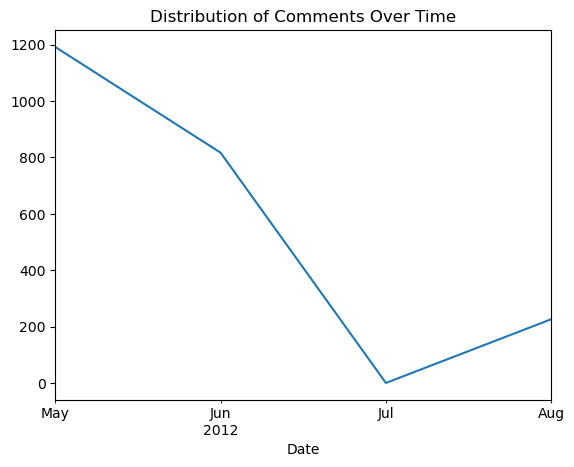

In [20]:
valid_date_data = data[data['Date'] != "Unknown"]

if not valid_date_data.empty:
    valid_date_data['Date'] = pd.to_datetime(valid_date_data['Date'])
    valid_date_data.set_index('Date').resample('M').size().plot()
    plt.title('Distribution of Comments Over Time')
    plt.show()

### Distribution of comments over time:

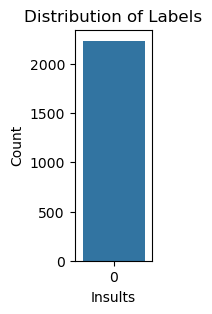

In [21]:
plt.figure(figsize=(1,3))
sns.countplot(data['Insult'])
plt.title('Distribution of Labels')
plt.xlabel('Insults')
plt.ylabel('Count')
plt.show()

### Comment Length Visualization:

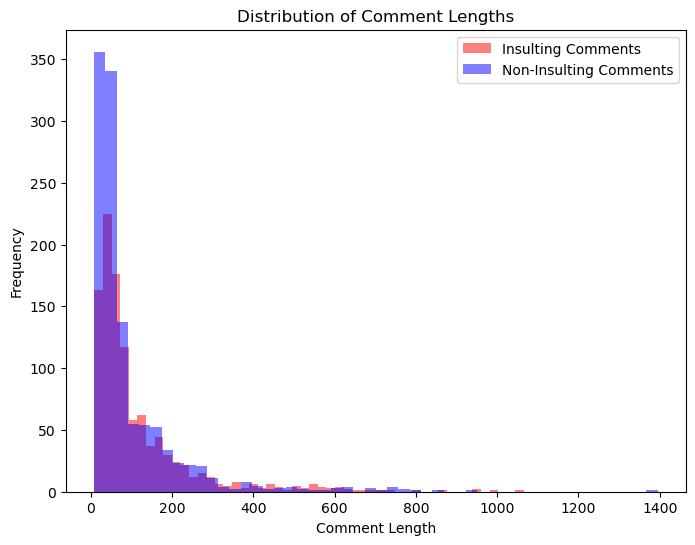

In [22]:
data['Comment Length'] = data['Comment'].apply(len)
insult_comments = data[data['Insult'] == 1]['Comment Length']
non_insult_comments = data[data['Insult'] == 0]['Comment Length']

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(insult_comments, bins=50, alpha=0.5, label='Insulting Comments', color='red')
plt.hist(non_insult_comments, bins=50, alpha=0.5, label='Non-Insulting Comments', color='blue')

plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Word Cloud:

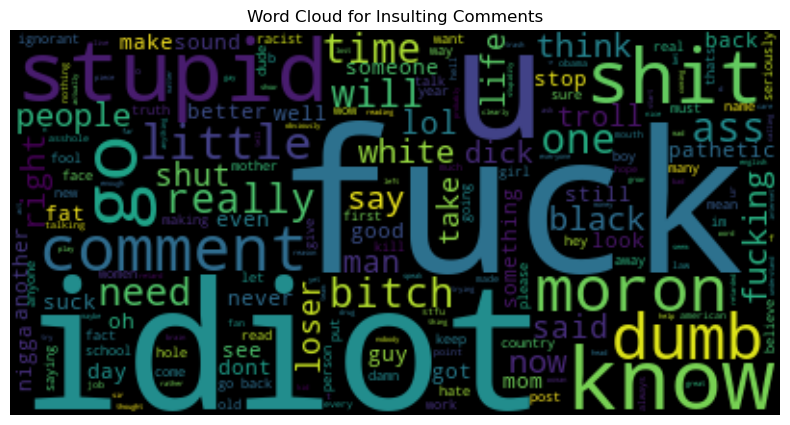

In [23]:
insult_comments = data[data['Insult'] == 1]

# Concatenate the selected comments into a single string
combined_comments = ' '.join(insult_comments['Comment'])

# Generate a word cloud from the concatenated comments
wordcloud = WordCloud().generate(combined_comments)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Insulting Comments')
plt.show()

## 3 modeling


 ### 3.1 logistic regression model 

In [24]:
X = data['Comment']
y = data['Insult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization of comments
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = logreg_model.predict(X_test_tfidf)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.68

Confusion Matrix:
[[164  61]
 [ 80 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       225
           1       0.70      0.64      0.67       222

    accuracy                           0.68       447
   macro avg       0.69      0.68      0.68       447
weighted avg       0.69      0.68      0.68       447



In [30]:
X = data['Comment']
y = data['Insult']

# TF-IDF Vectorization of comments
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

NameError: name 'SVC' is not defined

In [29]:
for model_name, model in models.items():
    # Use cross-validation for evaluation
    cv_scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy')
    
    # Make predictions using cross-validation
    y_pred_cv = cross_val_predict(model, X_tfidf, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred_cv)
    conf_matrix = confusion_matrix(y, y_pred_cv)
    classification_rep = classification_report(y, y_pred_cv)
    
    # Print results
    print(f"\nModel: {model_name}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")
    print(f"Overall Accuracy: {accuracy:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)

NameError: name 'models' is not defined